# **07.Autoencoder Code 실습**

[목적]
  - Deep Learning을 활용한 Dimensionality Reduction Code 실습
  - Autoencoder
  - Reveal Non-linear Structure
     - Text, Image 등 Data에 대해 시각화 하기 적합함
  - Class Label, Learning Algorithm이 아님
  
[Process]
  1. Define Data
  2. Modeling
  3. Plotting

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data

import warnings
warnings.filterwarnings('ignore')

from keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape

In [5]:
# MNIST Data Loading
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
x_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

이미지 데이터는 각 픽셀의 값이 보통 0부터 155 사이의 정수로 표현도니다. 여기서 0은 검은색을 ,255는 흰색을 나타내며, 그 사이의 값들은 서로 다른 회색조를 나타낸다. 따라서, 각 필의 값은 0과 255 사이의 값을 가진다.

해당 코드에서는 모든 필셀값을 255로 나눔을쏘 이미지 데이터를 정규화한다. 이렇게 하면 모든 필셀 값이 0과 1사이의 범위로 변환이 된다.

이러한 정규화를 수행하는 이유는 다음과 같다.
- 학습 속도 향상 : 모델 학습에 있어서 작은 입력값(0~1범위)을 사용하면 가중치 업데이트가 더 안정적이고 빠르게 이루어진다.
- 수렴 향상 : 정규화된 데이터는 모델이 수렴하는 데 도움을 준다. 특히 딥러닝에서는 입력 피처의 스케일이 서로 다를 경우 학습이 어려울 수 있다.
- 옵티마이저의 효율성 : 많은 옵티마이저들은 스케일링된 데이터에서 더 잘 작동합니다.

결론적으로, 이미지 데이터를 정규화함으로써 모델 학습의 안정성과 효율성을 높일 수 있다.

In [18]:
# Normalize pixel values to [0., 1.]
x_train = x_train / 255
x_test = x_test / 255

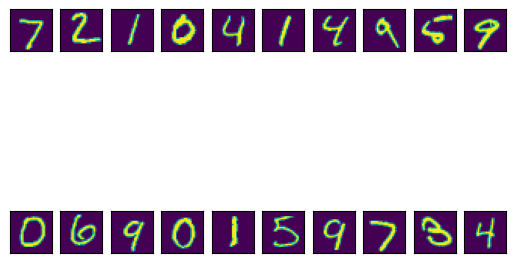

In [9]:
# MNIST Visualization
def show_images(num_images):
    if num_images % 10 == 0 and num_images <= 100:
        for digit_num in range(0,num_images):
            plt.subplot(int(num_images/10),10,digit_num+1) #create subplots
            mat_data = x_test[digit_num].reshape(28,28)  #reshape images
            plt.imshow(mat_data) #plot the data
            plt.xticks([]) #removes numbered labels on x-axis
            plt.yticks([]) #removes numbered labels on y-axis
show_images(20)

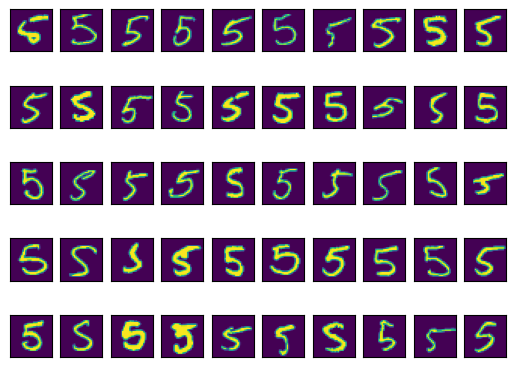

In [11]:
# 특정 숫자 보여주기
def show_images_by_digit(digit_to_see):
  if digit_to_see in list(range(10)):
    indices = np.where(y_test == digit_to_see) # pull indices for num of interest
    for digit_num in range(0,50):
      plt.subplot(5,10, digit_num+1) # create subplots
      #rehsape images
      mat_data = x_test[indices[0][digit_num]].reshape(28,28)
      plt.imshow(mat_data) # plot the data
      plt.xticks([]) # removes numbered labels on x-axis
      plt.yticks([]) # removes numbered labels on y-axis
show_images_by_digit(5)

[Autoencoder Dense Parameters]
  - Packge : https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
  - activation fuction : sigmoid가 기본이지만 Depth가 깊어질 수록 Gradient 문제가 발생하기 때문에 여러가지 function 들이 사용 됨
     - relu function
     - sigmoid function
     - softmax function
     - softplus function
     - softsign function
     - tanh function
     - selu function
     - elu function
     - exponential function
     - PReLU function
     - LeakyReLU function

---
[오토인코더 밀도 매개변수]
   - 패키지 : https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
   - 활성화 기능 : 시그모이드가 기본이지만 Depth가 들어가질수록 Gradient 문제가 발생하기 때문에 아쉬운 기능이 사용니
      - relu 기능
      - 시그모이드 함수
      - 소프트맥스 기능
      - 소프트플러스 기능
      - 소프트사인 기능
      - 탄 기능
      - 셀루 기능
      - 엘루 기능
      - 지수 함수
      - PReLU 기능
      - LeakyReLU 기능

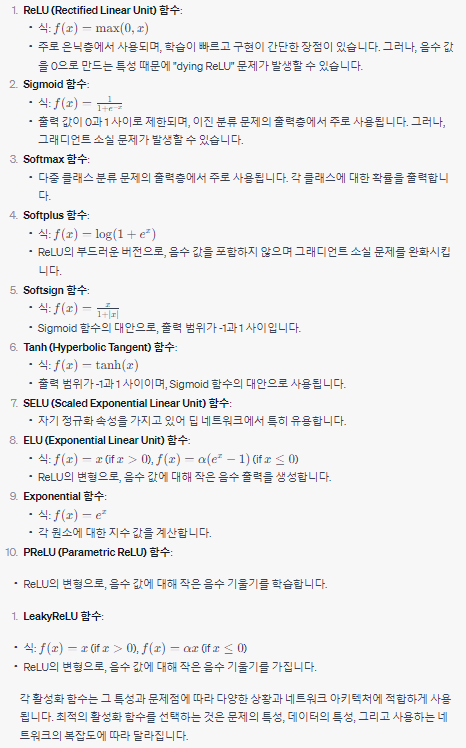

In [12]:
# This is the dimension of the latent space (encoding space)
latent_dim = 2

# Images are 28 by 28
img_shape = (x_train.shape[1], x_train.shape[2])

encoder = Sequential([
    Flatten(input_shape=img_shape),
    Dense(192, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(latent_dim, name='encoder_output')])

decoder = Sequential([
    Dense(64, activation='relu', input_shape=(latent_dim,)),
    Dense(128, activation='relu'),
    Dense(img_shape[0] * img_shape[1], activation='relu'),
    Reshape(img_shape)])

- 잠재 공간 (Latent Space)의 차원 정의:latent_dim = 2: 잠재 공간의 차원을 2로 설정합니다. 이는 오토인코더의 인코딩 부분의 출력 차원이며, 이미지 데이터를 2차원 벡터로 압축한다는 의미입니다.


- 입력 이미지의 형태 정의:img_shape = (x_train.shape[1], x_train.shape[2]): MNIST 이미지의 형태는 28x28입니다. img_shape는 이 이미지의 형태를 저장하는 튜플입니다.


- 인코더 정의:인코더는 입력 이미지를 잠재 공간으로 매핑하는 역할을 합니다.


- Flatten(input_shape=img_shape): 28x28 이미지를 784 크기의 벡터로 평탄화합니다.


- Dense(192, activation='relu'): 192개의 뉴런을 갖는 Dense 레이어입니다. 활성화 함수로는 ReLU를 사용합니다.


- Dense(64, activation='relu'): 64개의 뉴런을 갖는 Dense 레이어입니다.


- Dense(32, activation='relu'): 32개의 뉴런을 갖는 Dense 레이어입니다.
Dense(latent_dim, name='encoder_output'): 최종 출력 레이어로, 잠재 공간의 차원 수 (여기서는 2)만큼의 뉴런을 갖습니다. 이 레이어의 출력은 2차원 잠재 벡터입니다.


- 디코더 정의:디코더는 잠재 공간에서 원본 이미지로의 매핑을 수행하는 역할을 합니다.


- Dense(64, activation='relu', input_shape=(latent_dim,)): 64개의 뉴런을 갖는 Dense 레이어입니다. 입력으로는 2차원 잠재 벡터를 받습니다.


- Dense(128, activation='relu'): 128개의 뉴런을 갖는 Dense 레이어입니다.


- Dense(img_shape[0] * img_shape[1], activation='relu'): 원본 이미지의 크기와 동일한 크기의 Dense 레이어입니다 (784 뉴런).
Reshape(img_shape): 평탄화된 벡터를 원래의 28x28 이미지 형태로 재구성합니다.


결론적으로, 인코더는 입력 이미지를 2차원 잠재 벡터로 압축하며, 디코더는 이 2차원 벡터를 원본 이미지로 복원합니다. 이렇게 오토인코더는 데이터의 특징을 압축하여 표현하고, 이를 바탕으로 원본 데이터를 복원하는 역할을 합니다.

In [13]:
# iteration(epoch)에 따른 latent 1, 2의 변화
class TestEncoder(tf.keras.callbacks.Callback):
    def __init__(self, x_test, y_test):
        super(TestEncoder, self).__init__()
        self.x_test = x_test
        self.y_test = y_test
        self.current_epoch = 0

    def on_epoch_begin(self, epoch, logs={}):
        self.current_epoch = self.current_epoch + 1
        encoder_model = Model(inputs=self.model.input,
                              outputs=self.model.get_layer('encoder_output').output)
        encoder_output = encoder_model(self.x_test)
        plt.subplot(10, 5, self.current_epoch)
        plt.title("epoch : {}".format(self.current_epoch))
        plt.scatter(encoder_output[:, 0],
                    encoder_output[:, 1], s=15, alpha=0.8,
                    cmap='Set1', c=self.y_test[0:self.y_test.shape[0]])
        plt.xlim(-9, 9)
        plt.ylim(-9, 9)
        plt.xlabel('Latent Dimension 1')
        plt.ylabel('Latent Dimension 2')

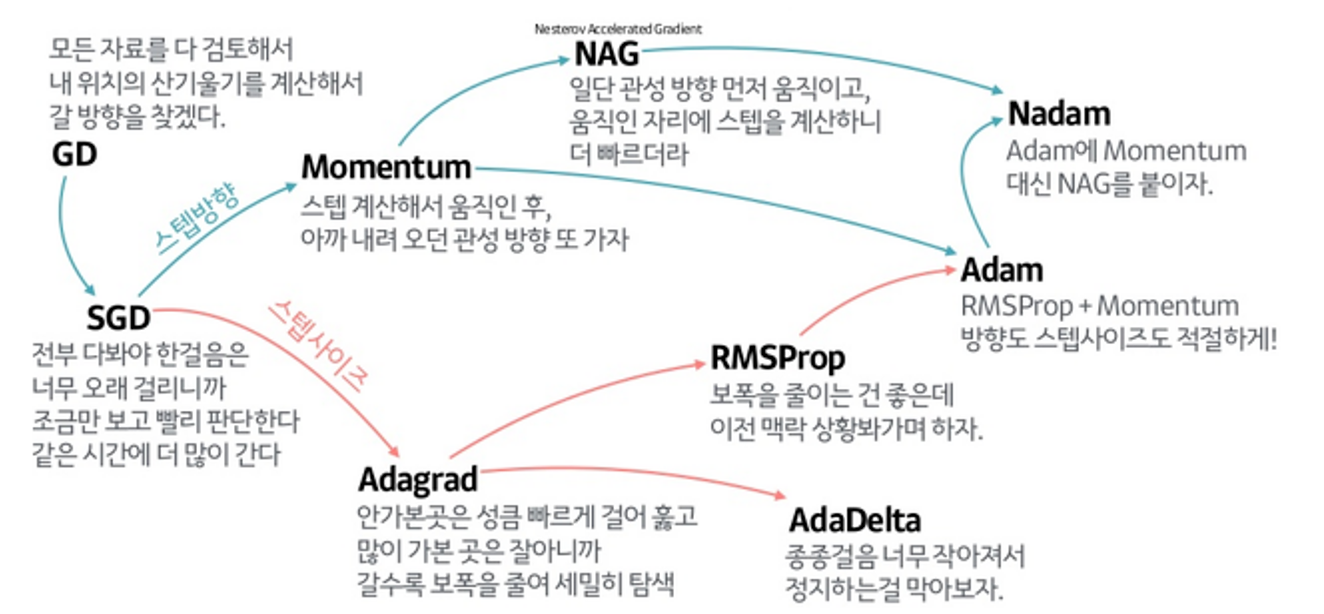

In [14]:
# Model Set-up
autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.output))
autoencoder.compile(loss='mean_squared_error', optimizer='adam')

- TestEncoder 콜백 클래스: tf.keras.callbacks.Callback: TensorFlow Keras의 콜백 클래스를 상속받아 사용자 정의 콜백을 구현합니다.

- __init__(self, x_test, y_test): 초기화 메서드에서 테스트 데이터와 라벨, 그리고 현재 에포크 번호를 저장합니다.

- on_epoch_begin(self, epoch, logs={}): 각 에포크 시작 시 호출되는 메서드입니다. 여기서 잠재 공간의 변화를 시각화합니다.
encoder_model: 현재 오토인코더 모델의 인코더 부분만을 추출하여 새로운 모델을 생성합니다.

- encoder_output: 테스트 데이터를 인코더 모델에 통과시켜 잠재 벡터를 얻습니다.
이후, plt.scatter를 사용하여 2D 잠재 공간에서의 데이터 분포를 시각화합니다. 색상은 각 데이터의 라벨에 따라 지정됩니다.

- 오토인코더 모델 설정: autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.output)): 인코더와 디코더를 결합하여 전체 오토인코더 모델을 생성합니다.

- autoencoder.compile(...): 모델을 컴파일합니다. 여기서는 손실 함수로 'mean_squared_error'를, 옵티마이저로 'adam'을 사용합니다.

결론적으로, 이 코드는 학습 중에 잠재 공간의 변화를 시각화하는 콜백 클래스를 정의하고, 이를 활용하여 오토인코더 모델의 학습을 진행하기 위한 설정을 포함하고 있습니다.

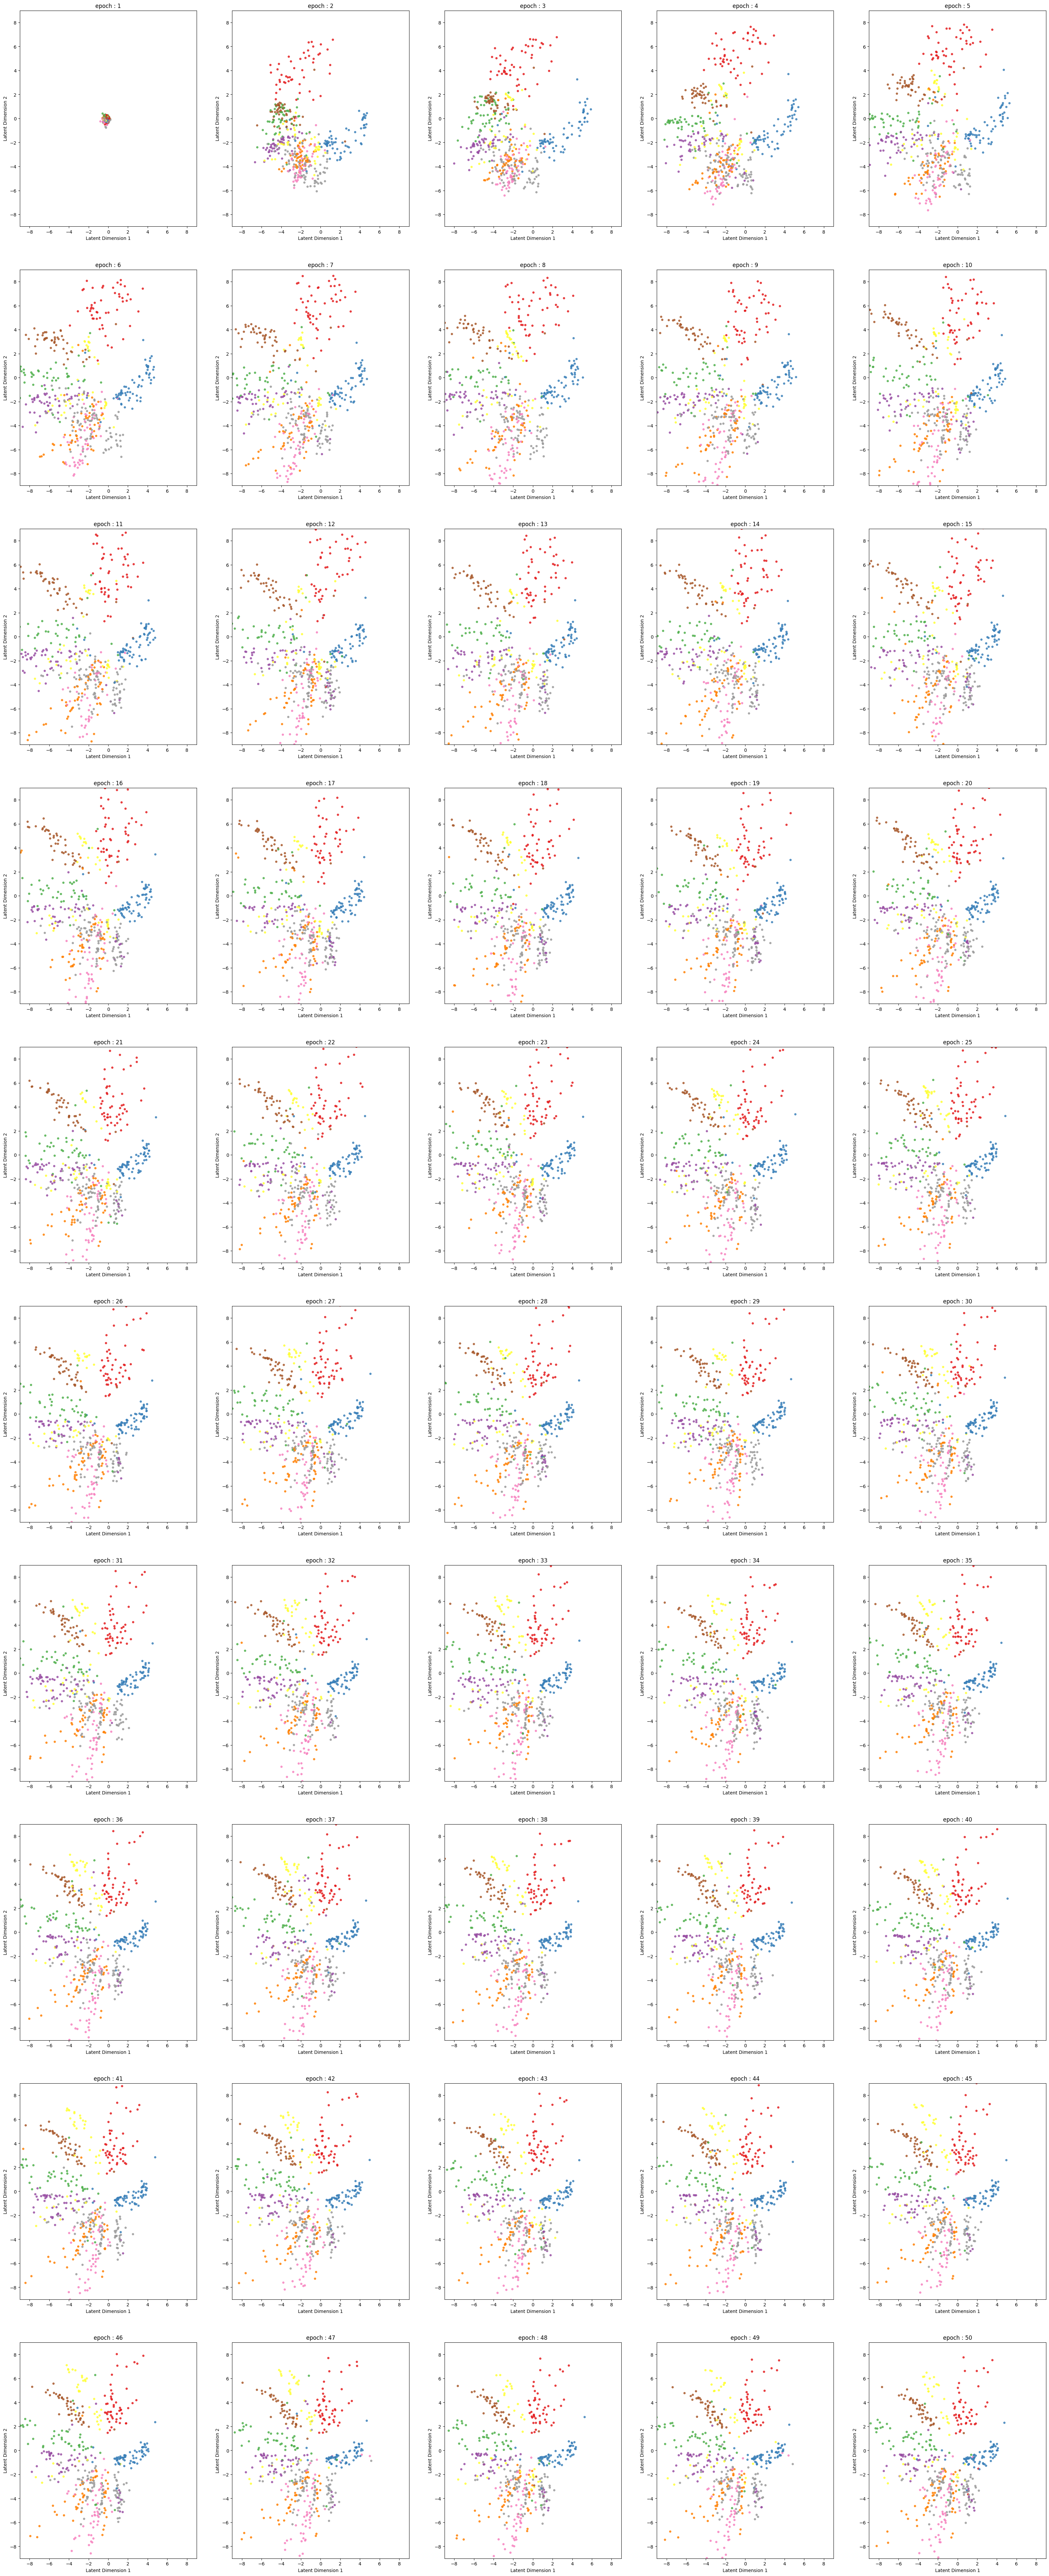

In [16]:
plt.figure(figsize=(40,100))
model_history = autoencoder.fit(x_train, x_train, epochs=50, batch_size=100, verbose=0,
                                callbacks=[TestEncoder(x_train[0:500], y_train[0:500])])

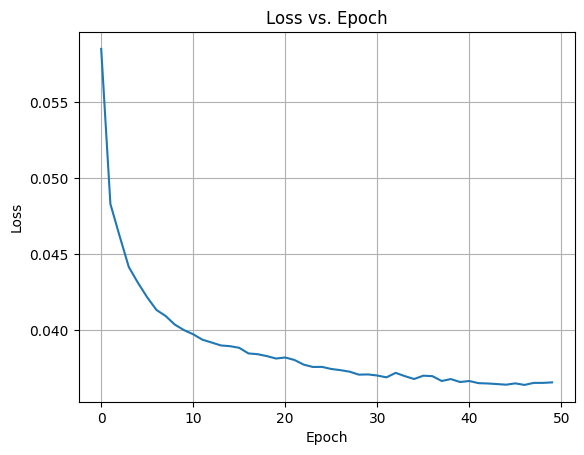

In [17]:
plt.plot(model_history.history["loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)